
## Task 1: Data Exploration and Preliminary Cleaning



#### Python Script:



In [18]:
# import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from datetime import datetime
import pytz
%matplotlib inline


In [19]:
# get data from csv file

df = pd.read_csv('sample_data .csv')


In [20]:
# display records
df.head(100)

,user_id,session_id,play_duration_seconds,story_id,timestamp,user_age_group,subscription_status
0,1043,s127,200.0,st9,2021-01-04 21:00:00,teen,activ
1,1060,s128,-10.0,st7,01/01/2021 16:00,0-3,NaN
2,1061,s134,300.0,st1,2021-01-03 04:00:00,8-12,unknown
3,1035,s112,50.0,st17,2021-01-04 09:00:00,5-12,expired
4,1087,s108,300.0,st15,2021-01-01 22:00:00,0-3,activ
...,...,...,...,...,...,...,...
95,1092,s188,150.0,st19,2021-01-01 13:00:00,5-12,NaN
96,1088,s178,50.0,st13,2021-01-03 16:00:00,0-3,
97,1063,s132,NaN,st3,2021-01-02 09:00:00,0-3,
98,1014,s159,NaN,st10,2021-01-01 14:00:00,4-7,expired


 #### a: Data Cleaning


In [21]:
# view the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                115 non-null    int64  
 1   session_id             115 non-null    object 
 2   play_duration_seconds  106 non-null    float64
 3   story_id               115 non-null    object 
 4   timestamp              115 non-null    object 
 5   user_age_group         103 non-null    object 
 6   subscription_status    99 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.4+ KB


In [22]:
# Define a new_story_id function to add 0 to the story_id if it has 3 digits

def new_story_id(story_id):
    str, num = story_id[:2], story_id[2:]
    if len(num) == 1:
        return f'{str}0{num}'
    return story_id

# Apply the function to the column
df['story_id'] = df['story_id'].apply(new_story_id)
df.head()


,user_id,session_id,play_duration_seconds,story_id,timestamp,user_age_group,subscription_status
0,1043,s127,200.0,st09,2021-01-04 21:00:00,teen,activ
1,1060,s128,-10.0,st07,01/01/2021 16:00,0-3,NaN
2,1061,s134,300.0,st01,2021-01-03 04:00:00,8-12,unknown
3,1035,s112,50.0,st17,2021-01-04 09:00:00,5-12,expired
4,1087,s108,300.0,st15,2021-01-01 22:00:00,0-3,activ


In [23]:
# user_id, session_id and stroy_id columns are not null.
# Session_id column always start with s, and story_id start with 'st',  So remove 's' and 'st' to make data clean

df['session_id'] = df['session_id'].str[1:].astype(str)
df['story_id'] = df['story_id'].str[2:].astype(str)
df.head()


,user_id,session_id,play_duration_seconds,story_id,timestamp,user_age_group,subscription_status
0,1043,127,200.0,09,2021-01-04 21:00:00,teen,activ
1,1060,128,-10.0,07,01/01/2021 16:00,0-3,NaN
2,1061,134,300.0,01,2021-01-03 04:00:00,8-12,unknown
3,1035,112,50.0,17,2021-01-04 09:00:00,5-12,expired
4,1087,108,300.0,15,2021-01-01 22:00:00,0-3,activ


In [24]:
#  - Dublication of the data with same user_id and session_id;
#      create user_session_id column and filter distinct records

#  - There are some records with same session_id; I did not filtered it out by assuming
#    two or more users sharing the same session
    
df['user_session_id'] = df['user_id'].astype(str)+ df['session_id'].astype(str)
df= df.drop_duplicates(subset='user_session_id', keep='first')
df.head()


,user_id,session_id,play_duration_seconds,story_id,timestamp,user_age_group,subscription_status,user_session_id
0,1043,127,200.0,09,2021-01-04 21:00:00,teen,activ,1043127
1,1060,128,-10.0,07,01/01/2021 16:00,0-3,NaN,1060128
2,1061,134,300.0,01,2021-01-03 04:00:00,8-12,unknown,1061134
3,1035,112,50.0,17,2021-01-04 09:00:00,5-12,expired,1035112
4,1087,108,300.0,15,2021-01-01 22:00:00,0-3,activ,1087108


In [25]:
# convert negative value from 'play_duration_seconds' to postitive , replace NaN with 0 and convert float to int

df['play_duration_seconds'] = df['play_duration_seconds'].fillna(0).abs().astype(int)
df.head()


,user_id,session_id,play_duration_seconds,story_id,timestamp,user_age_group,subscription_status,user_session_id
0,1043,127,200,09,2021-01-04 21:00:00,teen,activ,1043127
1,1060,128,10,07,01/01/2021 16:00,0-3,NaN,1060128
2,1061,134,300,01,2021-01-03 04:00:00,8-12,unknown,1061134
3,1035,112,50,17,2021-01-04 09:00:00,5-12,expired,1035112
4,1087,108,300,15,2021-01-01 22:00:00,0-3,activ,1087108


In [26]:
# Function to format the timestamp
def format_timestamp(timestamp):
    try:
        # Try parsing the timestamp with the first format
        parsed_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
    except ValueError:
        try:
            # If the first format fails, try the second format
            parsed_timestamp = datetime.strptime(timestamp, '%m/%d/%Y %H:%M')
        except ValueError:
            # If both formats fail, return '0'
            return '0'
    
    # Return the formatted timestamp as a string
    return parsed_timestamp.strftime('%Y-%m-%d %H:%M:%S')

# Apply the function to the dataframe
df['timestamp'] = df['timestamp'].apply(format_timestamp)

df.head()

,user_id,session_id,play_duration_seconds,story_id,timestamp,user_age_group,subscription_status,user_session_id
0,1043,127,200,09,2021-01-04 21:00:00,teen,activ,1043127
1,1060,128,10,07,2021-01-01 16:00:00,0-3,NaN,1060128
2,1061,134,300,01,2021-01-03 04:00:00,8-12,unknown,1061134
3,1035,112,50,17,2021-01-04 09:00:00,5-12,expired,1035112
4,1087,108,300,15,2021-01-01 22:00:00,0-3,activ,1087108


In [27]:
# Convert the datetime objects to the desired string format

#df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
#df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S').fillna('null')
#df.head()


In [28]:
# convert timestamp_UTC column to timestamp_cet

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
# localize the non-null datetime values to UTC
utc = pytz.utc
df['timestamp_utc'] = df['timestamp'].apply(lambda x: utc.localize(x) if pd.notnull(x) else x)

#  Convert the non-null UTC localized datetime values to CET/CEST
cet = pytz.timezone('Europe/Berlin')

# convert to timestamp CET/ CEST
df['timestamp_cet'] = df['timestamp_utc'].apply(lambda x: x.astimezone(cet) if pd.notnull(x) else x)#

# Format CET/CEST datetime as naive datetime objects (without timezone information) --timestamp_cet_naive
df['timestamp_cet'] = df['timestamp_cet'].apply(lambda x: x.replace(tzinfo=None) if pd.notnull(x) else x).fillna('null')

#df.head()

In [29]:
df.drop(columns=['timestamp', 'timestamp_utc'], inplace=True)
df.head()

,user_id,session_id,play_duration_seconds,story_id,user_age_group,subscription_status,user_session_id,timestamp_cet
0,1043,127,200,09,teen,activ,1043127,2021-01-04 22:00:00
1,1060,128,10,07,0-3,NaN,1060128,2021-01-01 17:00:00
2,1061,134,300,01,8-12,unknown,1061134,2021-01-03 05:00:00
3,1035,112,50,17,5-12,expired,1035112,2021-01-04 10:00:00
4,1087,108,300,15,0-3,activ,1087108,2021-01-01 23:00:00


In [30]:
# Mapping function of user_age_group column with non-overlapping
def mapping_age_group(user_age_group):
    if user_age_group == '0-3':
        return '0-3'
    elif user_age_group in ['4-7', '8-12', '5-12']:
        return '4-12'
    elif user_age_group == 'teen':
        return '13-19'
    else:
        return 'unknown'

# Apply the mapping function
df['user_age_group'] = df['user_age_group'].apply(mapping_age_group)
df.head()

,user_id,session_id,play_duration_seconds,story_id,user_age_group,subscription_status,user_session_id,timestamp_cet
0,1043,127,200,09,13-19,activ,1043127,2021-01-04 22:00:00
1,1060,128,10,07,0-3,NaN,1060128,2021-01-01 17:00:00
2,1061,134,300,01,4-12,unknown,1061134,2021-01-03 05:00:00
3,1035,112,50,17,4-12,expired,1035112,2021-01-04 10:00:00
4,1087,108,300,15,0-3,activ,1087108,2021-01-01 23:00:00


In [31]:
# function to group the subscription status
def new_subscription_status(subscription_status):
    if subscription_status in ('activ', 'active'):
        return 'active'
    elif subscription_status == 'expired':
        return 'expired'
    else:
        return 'unknown'

# Apply the mapping function
df['subscription_status'] = df['subscription_status'].apply(new_subscription_status)
df.tail()

,user_id,session_id,play_duration_seconds,story_id,user_age_group,subscription_status,user_session_id,timestamp_cet
107,1001,134,50,00,0-3,active,1001134,2021-01-02 09:00:00
108,1091,151,10,00,4-12,active,1091151,2021-01-04 01:00:00
109,1003,170,50,01,13-19,active,1003170,2021-01-04 12:00:00
112,1086,100,10,15,13-19,unknown,1086100,2021-01-05 09:00:00
113,1003,108,50,11,13-19,unknown,1003108,2021-01-03 16:00:00


In [32]:
# save the file to CSV
df.to_csv('output.csv', index=False)

#### b: Data Exploration and Visualization

In [33]:
#  count of subscription_status column
df['subscription_status'].value_counts()

subscription_status
unknown    49
active     36
expired    15
Name: count, dtype: int64

In [34]:
# count of user_age_group
df['user_age_group'].value_counts()

user_age_group
4-12       47
13-19      21
0-3        21
unknown    11
Name: count, dtype: int64

In [35]:
# count of play_duration_seconds
df['play_duration_seconds'].value_counts()

play_duration_seconds
50     24
10     20
300    20
200    14
150    14
0       8
Name: count, dtype: int64

In [36]:
# converting null to NaN in timestamp column to perform following analysis
df['timestamp_cet']=pd.to_datetime(df['timestamp_cet'].replace('null', ''))

In [37]:

#split timestamp_cet column to date, hour, day_name

df['date'] = df['timestamp_cet'].dt.date
df['year'] = df['timestamp_cet'].dt.year
df['month'] = df['timestamp_cet'].dt.month
df['day'] = df['timestamp_cet'].dt.day
df['hour'] = df['timestamp_cet'].dt.hour
df['day_name']  = df['timestamp_cet'].dt.day_name() 
df.head()


,user_id,session_id,play_duration_seconds,story_id,user_age_group,subscription_status,user_session_id,timestamp_cet,date,year,month,day,hour,day_name
0,1043,127,200,09,13-19,active,1043127,2021-01-04 22:00:00,2021-01-04,2021,1,4,22,Monday
1,1060,128,10,07,0-3,unknown,1060128,2021-01-01 17:00:00,2021-01-01,2021,1,1,17,Friday
2,1061,134,300,01,4-12,unknown,1061134,2021-01-03 05:00:00,2021-01-03,2021,1,3,5,Sunday
3,1035,112,50,17,4-12,expired,1035112,2021-01-04 10:00:00,2021-01-04,2021,1,4,10,Monday
4,1087,108,300,15,0-3,active,1087108,2021-01-01 23:00:00,2021-01-01,2021,1,1,23,Friday


<Axes: xlabel='day_name', ylabel='count'>

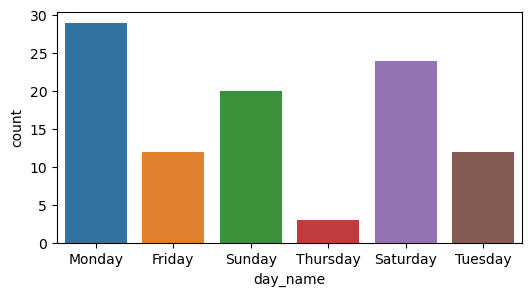

In [38]:
# plot dataframe based on weekday
plt.figure(figsize=(6,3))

sns.countplot(x='day_name', data = df)

<Axes: xlabel='hour', ylabel='count'>

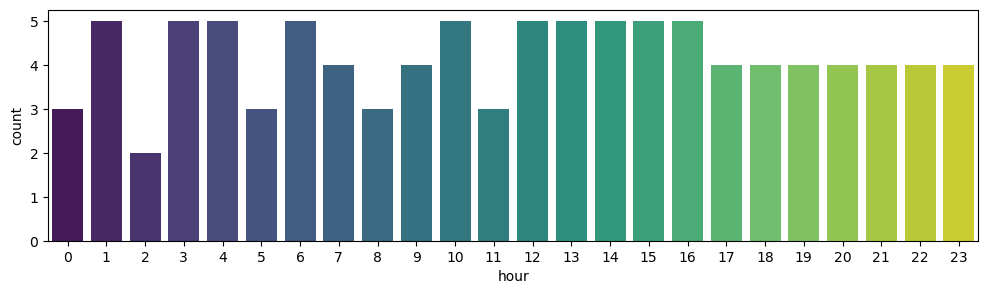

In [39]:
# plot dataframe based on count of hour
plt.figure(figsize=(12,3))
sns.countplot(x='hour', data = df, palette='viridis')

<Axes: xlabel='user_age_group', ylabel='count'>

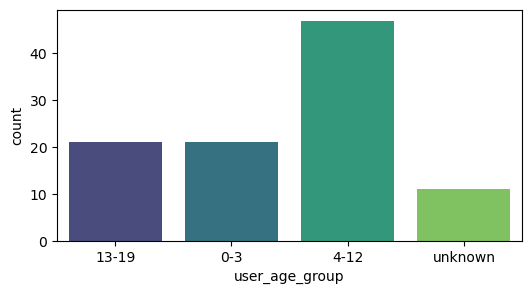

In [40]:
# plot dataframe based on count of user_age_group
plt.figure(figsize=(6,3))
sns.countplot(x='user_age_group', data = df, palette='viridis')

<Axes: xlabel='story_id', ylabel='count'>

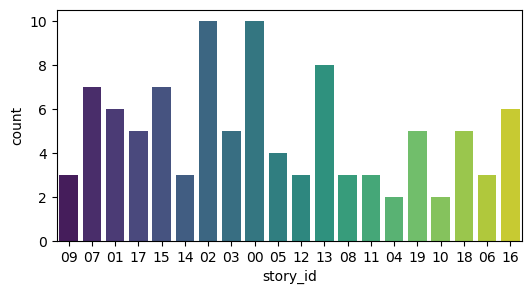

In [41]:
# plot based on count of story_id
plt.figure(figsize=(6,3))
sns.countplot(x='story_id', data = df, palette='viridis')

<Axes: xlabel='subscription_status', ylabel='count'>

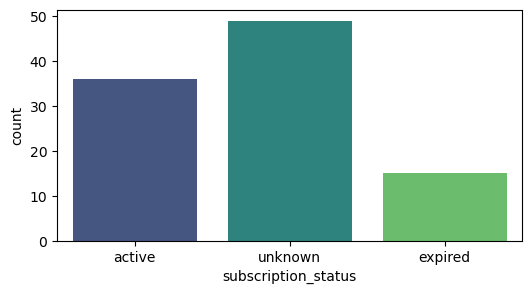

In [42]:
# plot based on count of subscription_status
plt.figure(figsize=(6,3))
sns.countplot(x='subscription_status', data = df, palette='viridis')

                                                                       Thank you!!!